In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
dataset_path = '/content/drive/MyDrive/PD_Data/imgs/'
dirs = os.listdir(dataset_path)

In [4]:
for dir in dirs:
  files = list(os.listdir(dataset_path + dir))
  print(dir + ' Folder has ' + str(len(files)) + ' Images')

non_parkinson_faces Folder has 1266 Images
parkinson_faces Folder has 6845 Images


In [5]:
base_dir = dataset_path
img_size = 180
batch = 32

In [6]:
# Load images into arrays as Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset = 'training',
    batch_size=batch,
    image_size = (img_size, img_size)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset = 'validation',
    batch_size=batch,
    image_size = (img_size, img_size)
)

Found 5373 files belonging to 2 classes.
Using 4299 files for training.
Found 5373 files belonging to 2 classes.
Using 1074 files for validation.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [9]:
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [11]:
# Creating the model
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3)

])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [14]:
# Check if a GPU is available and set the device
if tf.config.list_physical_devices('GPU'):
    device = '/GPU:0'
else:
    device = '/CPU:0'
print(f"Using device: {device}")

# Place model on the specified device
with tf.device(device):
    model.build(input_shape=(None, 224, 224, 3))  # Example input shape


Using device: /GPU:0


In [15]:
history = model.fit(
    train_ds,
    epochs=8,
    validation_data=validation_ds,
    batch_size=128,
)

Epoch 1/8
135/135 [==============================] - 664s 1s/step - loss: 0.3963 - accuracy: 0.8044 - val_loss: 0.1968 - val_accuracy: 0.9209
Epoch 2/8
135/135 [==============================] - 4s 30ms/step - loss: 0.1636 - accuracy: 0.9339 - val_loss: 0.0805 - val_accuracy: 0.9683
Epoch 3/8
135/135 [==============================] - 4s 28ms/step - loss: 0.1212 - accuracy: 0.9518 - val_loss: 0.0995 - val_accuracy: 0.9562
Epoch 4/8
135/135 [==============================] - 4s 28ms/step - loss: 0.0971 - accuracy: 0.9656 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 5/8
135/135 [==============================] - 4s 29ms/step - loss: 0.0793 - accuracy: 0.9728 - val_loss: 0.0504 - val_accuracy: 0.9814
Epoch 6/8
135/135 [==============================] - 4s 28ms/step - loss: 0.0565 - accuracy: 0.9802 - val_loss: 0.0416 - val_accuracy: 0.9860
Epoch 7/8
135/135 [==============================] - 4s 28ms/step - loss: 0.0599 - accuracy: 0.9784 - val_loss: 0.0285 - val_accuracy: 0.9888
Epoch 

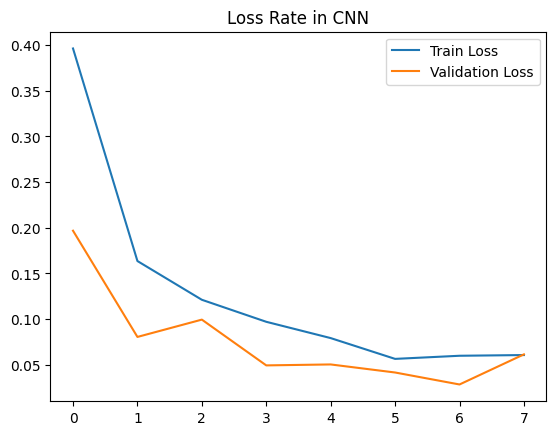

In [16]:
import matplotlib.pyplot as plt  # Import the necessary module

plt.title("Loss Rate in CNN")
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
#loss ve accuracy Train uzerinde, val_loss ve val_accuracy Test uzerindeki sonuclar
plt.legend()
plt.show()

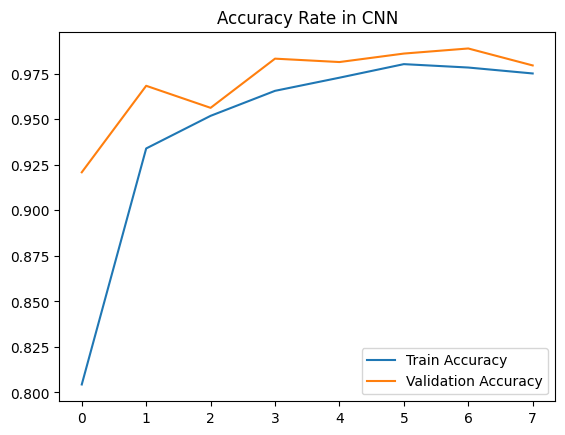

In [17]:
plt.figure()
plt.title("Accuracy Rate in CNN")
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [18]:
# Testing the model
sample_ds_path = '/content/drive/MyDrive/Data/Frames/test/parkinson/'
sample_dir = os.listdir(sample_ds_path)
sample_dir

['frame_3000.jpg',
 'frame_6000.jpg',
 'frame_9000.jpg',
 'frame_29625.jpg',
 'frame_28125.jpg',
 'frame_28750.jpg',
 'frame_27875.jpg',
 'frame_28000.jpg',
 'frame_31125.jpg',
 'frame_29875.jpg',
 'frame_28500.jpg',
 'frame_27625.jpg',
 'frame_29375.jpg',
 'frame_27750.jpg',
 'frame_29000.jpg',
 'frame_29500.jpg',
 'frame_28625.jpg',
 'frame_27500.jpg',
 'frame_29750.jpg',
 'frame_30250.jpg',
 'frame_31000.jpg',
 'frame_28250.jpg',
 'frame_30750.jpg',
 'frame_30000.jpg',
 'frame_48552.jpg',
 'frame_48433.jpg',
 'frame_47600.jpg',
 'frame_47838.jpg',
 'frame_48314.jpg',
 'frame_50456.jpg',
 'frame_50813.jpg',
 'frame_50218.jpg',
 'frame_48195.jpg',
 'frame_47957.jpg',
 'frame_49266.jpg',
 'frame_52836.jpg',
 'frame_58667.jpg',
 'frame_55335.jpg',
 'frame_55573.jpg',
 'frame_51646.jpg',
 'frame_51765.jpg',
 'frame_53669.jpg',
 'frame_50099.jpg',
 'frame_57001.jpg',
 'frame_51408.jpg',
 'frame_57239.jpg',
 'frame_52955.jpg',
 'frame_52122.jpg',
 'frame_54264.jpg',
 'frame_53788.jpg',
 'f

In [19]:
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array, 0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = chart_names[np.argmax(result)] + ', Score: ' + str(np.max(result)*100)
  return outcome

In [20]:
chart_names = ['parkinson' , 'non_parkinson']
chart_names

['parkinson', 'non_parkinson']

In [21]:
for img in sample_dir:
  img_path = sample_ds_path + img
  cls = classify_images(img_path)
  print(f'Image: {img}, Result: {cls}')

1/1 [==============================] - 0s 315ms/step
Image: frame_3000.jpg, Result: non_parkinson, Score: 99.29319620132446
1/1 [==============================] - 0s 34ms/step
Image: frame_6000.jpg, Result: non_parkinson, Score: 62.30589151382446
1/1 [==============================] - 0s 32ms/step
Image: frame_9000.jpg, Result: non_parkinson, Score: 97.71690964698792
1/1 [==============================] - 0s 19ms/step
Image: frame_29625.jpg, Result: non_parkinson, Score: 84.90398526191711
1/1 [==============================] - 0s 18ms/step
Image: frame_28125.jpg, Result: non_parkinson, Score: 99.99942779541016
1/1 [==============================] - 0s 19ms/step
Image: frame_28750.jpg, Result: non_parkinson, Score: 99.7537612915039
1/1 [==============================] - 0s 17ms/step
Image: frame_27875.jpg, Result: non_parkinson, Score: 100.0
1/1 [==============================] - 0s 17ms/step
Image: frame_28000.jpg, Result: non_parkinson, Score: 99.99990463256836
1/1 [==================